<a id="header"></a>
<div style="border: 1px solid; color: #fff600; background-color: #fff600;">
    <center><img src="img/Credit-Card-Fraud-Detection.png"></center>
    <div style="border: 5px solid; color: #19a01a; border-radius: 5px; margin: 10px; padding: 15px;">
        <h1 style="font-size: 26px; color: #19a01a; text-align: center; font-family: Blogger Sans; font-weight: bold; line-height: 28px;">Project 03</h1>
        <h1 style="font-size: 26px; color: #19a01a; text-align: center; font-family: Blogger Sans; font-weight: bold; line-height: 28px;">💳 Credit Card Fraud Detection: An Ensemble Approach 🕵️</h1>
        <h1 style="font-size: 26px; color: #19a01a; text-align: center; font-family: Blogger Sans; font-weight: bold; line-height: 28px;">🧱 By: Khair Ullah 🌹</h1> 
        <h1 style="font-size: 26px; color: #19a01a; text-align: center; font-family: Blogger Sans; font-weight: bold; line-height: 28px;">&#128293; Data Science Intern at Pinnacle Full-Stack Interns &#128153;</h1>
    </div>
</div>

# Introduction

<p style="font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">This project, part of my Data Science Internship at Pinnacle Full-Stack Interns (Remote), aims to develop an advanced fraud detection system for credit card transactions using ensemble learning techniques. By leveraging multiple base models, ensemble methods enhance prediction accuracy. The project encompasses data preprocessing, feature engineering, and training ensemble models like Random Forest, Gradient Boosting, and XGBoost to detect anomalies in transaction data. Through this endeavor, I will deepen my understanding of ensemble learning, fraud analytics, and develop robust solutions for fraud prevention. This experience will also bolster my proficiency in Python programming and model evaluation techniques.</p>

# Problem Statement

<p style="font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">Credit card fraud is a significant challenge for financial institutions, resulting in substantial monetary losses annually. Detecting fraudulent transactions promptly and accurately is crucial to prevent unauthorized charges and protect customers. Traditional fraud detection methods often fall short due to the complex and evolving nature of fraudulent activities. Thus, there is a need for an advanced fraud detection system that leverages ensemble learning techniques. By combining multiple base models, ensemble methods can improve prediction accuracy and effectively identify fraudulent transactions, providing a robust solution to this persistent problem.</p>

# Objectives

<ul style="margin: 12px 0px 0px 12px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <li style="font-size: 18px; padding-bottom: 10px;">To define a comprehensive data preprocessing pipeline for handling missing values and scaling features.</li>
    <li style="font-size: 18px; padding-bottom: 10px;">To develop feature engineering techniques to extract meaningful patterns from raw transaction data.</li>
    <li style="font-size: 18px; padding-bottom: 10px;">To train ensemble models, including Random Forest, Gradient Boosting, and XGBoost, for fraud detection.</li>
    <li style="font-size: 18px; padding-bottom: 10px;">To evaluate the performance of ensemble models using metrics such as AUC, precision, and recall.</li>
    <li style="font-size: 18px; padding-bottom: 10px;">To implement a robust fraud detection system capable of identifying anomalies in real-time transactions.</li>
</ul>

# About the Data

<p style="font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">The dataset used for this project contains credit card transactions made by European cardholders in September 2013. It includes 284,807 transactions over two days, with 492 labeled as fraudulent. The dataset is highly imbalanced, with fraudulent transactions accounting for only 0.172% of the total. All input variables are numerical and have undergone PCA transformation, except for 'Time' and 'Amount'. 'Time' represents the elapsed seconds between each transaction and the first transaction, while 'Amount' is the transaction amount. Due to confidentiality, the original features are unavailable. Accuracy measurement is recommended using the Area Under the Precision-Recall Curve (AUPRC).</p>

<div style='background-color: #fff7f7; border: 2px solid #e81123; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px;'><center><img src="https://raw.githubusercontent.com/khairullahhamsafar/portfolio_prjects/main/Data_Scientists_Salaries_Analysis/img/icon_01.png" width="100px" height="100px"></center>
    <p style="font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">"&#127807; In the vast library of knowledge, my notebook is a chapter waiting for your upvote. As J.K. Rowling once said, 'We are only as strong as we are united, as weak as we are divided.' Let's unite, support, and elevate each other's contributions! &#128154;	&#128218;"</p>
    <p style="font-size: 18px; font-weight: normal; font-family: Blogger Sans; text-align: right; line-height: 30px; letter-spacing: 1px; color: #42ba00;">Kind regards, Khairullah Hamsafar</p>
</div>

# <p style="background: #1163ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: #ffce00; text-align: center; font-size: 24px; font-weight: bold; line-height: 1; border-radius: 50% 0 / 350PX 50%; margin-bottom: 20px; padding: 20px; box-shadow: 0px 8px 12px rgba(0, 0, 0, 0.4);">1. Importing necessary libraries.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Defining constants for configuration.
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100
NO_JOBS = 4
VALIDATION_SIZE = 0.20
TEST_SIZE = 0.20
NUMBER_KFOLDS = 5
MAX_ROUNDS = 1000
EARLY_STOP = 50
OPT_ROUNDS = 1000
VERBOSE_EVAL = 50

# <p style="background: #1163ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: #ffce00; text-align: center; font-size: 24px; font-weight: bold; line-height: 1; border-radius: 50% 0 / 350PX 50%; margin-bottom: 20px; padding: 20px; box-shadow: 0px 8px 12px rgba(0, 0, 0, 0.4);">2. Loading data, and converting it into a DataFrame.</p>

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv("Dataset/creditcard.csv")

In [5]:
df = pd.DataFrame(data)

# <p style="background: #1163ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: #ffce00; text-align: center; font-size: 24px; font-weight: bold; line-height: 1; border-radius: 50% 0 / 350PX 50%; margin-bottom: 20px; padding: 20px; box-shadow: 0px 8px 12px rgba(0, 0, 0, 0.4);">3. Exploratory Data Analysis (EDA).</p>

In [6]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [9]:
df.shape

(284807, 31)

In [10]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


In [11]:
# Observing ratio of 'Legitimate' vs 'Fraudulent', with the help of bar plot using Plotly.
fig = px.bar(class_counts, x=class_counts.index, y=class_counts.values, 
             labels={'x': 'Class', 'y': 'Count'}, 
             title='Legitimate vs Fraudulent')
fig.show()

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">Based on the classes Legitimate and Fraudulent transactions, our data is highly imbalanced.</li>
        <li style="margin-bottom: 10px;">The Legitimate class contains 284,315 records, while the Fraudulent class contains only 492 records.</li>
        <li style="margin-bottom: 10px;">This imbalance can make the models highly biased towards one class.</li>
        <li style="margin-bottom: 10px;">So, the best approach to handle this imbalance is to take sample records from the Legitimate class equal to the Fraudulent class.</li>
        <li style="margin-bottom: 10px;">For this purpose, we'll first need to split our data based on class category as 0 or 1. Then, we'll take a sample of the legitimate category, concatenate the legitimate sample with the fraudulent category, and replace the old DataFrame with this newly concatenated DataFrame.</li>
    </ul>
</div>

# <p style="background: #1163ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: #ffce00; text-align: center; font-size: 24px; font-weight: bold; line-height: 1; border-radius: 50% 0 / 350PX 50%; margin-bottom: 20px; padding: 20px; box-shadow: 0px 8px 12px rgba(0, 0, 0, 0.4);">4. Handling Imbalanced Data.</p>

In [12]:
legitimate = df[df['Class'] == 0]
fraudulent = df[df['Class'] == 1]

In [13]:
legitimate['Class'].unique()

array([0], dtype=int64)

In [14]:
legitimate.shape

(284315, 31)

In [15]:
legitimate.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [16]:
fraudulent['Class'].unique()

array([1], dtype=int64)

In [17]:
fraudulent_shape = fraudulent.shape
fraudulent_shape

(492, 31)

In [18]:
fraudulent.head()

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  

[5 rows x 31 columns]

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Notices</div>
<p>The number of fraudulent category records can be extracted by applying the pandas <code>unique()</code> function on it. By default, the pandas unique function returns a tuple. However, for panda's <code>sample()</code> function, we need an integer value as the number of samples we will take. So, we need to store the unique function's results in a variable and then convert it into an integer by using <code>int()</code> function.</p>

In [19]:
fraudulent_shape = int(fraudulent_shape[0])

In [20]:
type(fraudulent_shape)

int

In [21]:
# Now taking sample as number of fraudulent records.
legitimate_sample = legitimate.sample(n=fraudulent_shape)
legitimate_sample.head()

Time        V1        V2        V3        V4        V5        V6  \
158967  112036.0  2.207693 -1.589124 -1.387503 -1.770081 -0.859695 -0.139636   
139721   83311.0 -0.309817  1.056971  0.843958 -0.224608  0.697356  0.062024   
284589  172582.0 -0.527516 -0.520295 -1.223260 -2.859174  0.504635 -1.597727   
63515    50752.0 -1.378840  0.651193  2.103157  2.539511 -0.115734  1.796837   
81753    59073.0  0.919764 -0.599375  1.937806  1.927502 -1.573348  0.660061   

              V7        V8        V9  ...       V21       V22       V23  \
158967 -1.021113 -0.114676 -1.424892  ... -0.148942 -0.075998  0.026753   
139721  0.608440  0.133735 -0.319014  ... -0.303837 -0.765781 -0.111144   
284589  0.308583 -0.060938 -2.920630  ...  0.233154  0.673689 -0.049742   
63515   1.434561 -0.570616  0.014362  ... -0.312450  0.510093 -0.263160   
81753  -1.094541  0.467859  1.805262  ...  0.011154  0.423042 -0.029638   

             V24       V25       V26       V27       V28  Amount  Class  
158967 -1.112134 -0.078745 -0.120193 -0.008727 -0.061178   80.00      0  
139721 -0.987415 -0.101968  0.164263  0.260703  0.084395    2.58      0  
284589  0.686058 -0.317749 -0.204956  0.041311  0.056362   42.00      0  
63515  -0.936963  0.501861  0.428379  0.136097 -0.346906  228.20      0  
81753   0.637326  0.364579 -0.230099  0.111212  0.046806   55.12      0  

[5 rows x 31 columns]

In [22]:
legitimate_sample.shape

(492, 31)

In [23]:
fraudulent.shape

(492, 31)

In [24]:
df = pd.concat([legitimate_sample, fraudulent], axis=0)
df.head()

Time        V1        V2        V3        V4        V5        V6  \
158967  112036.0  2.207693 -1.589124 -1.387503 -1.770081 -0.859695 -0.139636   
139721   83311.0 -0.309817  1.056971  0.843958 -0.224608  0.697356  0.062024   
284589  172582.0 -0.527516 -0.520295 -1.223260 -2.859174  0.504635 -1.597727   
63515    50752.0 -1.378840  0.651193  2.103157  2.539511 -0.115734  1.796837   
81753    59073.0  0.919764 -0.599375  1.937806  1.927502 -1.573348  0.660061   

              V7        V8        V9  ...       V21       V22       V23  \
158967 -1.021113 -0.114676 -1.424892  ... -0.148942 -0.075998  0.026753   
139721  0.608440  0.133735 -0.319014  ... -0.303837 -0.765781 -0.111144   
284589  0.308583 -0.060938 -2.920630  ...  0.233154  0.673689 -0.049742   
63515   1.434561 -0.570616  0.014362  ... -0.312450  0.510093 -0.263160   
81753  -1.094541  0.467859  1.805262  ...  0.011154  0.423042 -0.029638   

             V24       V25       V26       V27       V28  Amount  Class  
158967 -1.112134 -0.078745 -0.120193 -0.008727 -0.061178   80.00      0  
139721 -0.987415 -0.101968  0.164263  0.260703  0.084395    2.58      0  
284589  0.686058 -0.317749 -0.204956  0.041311  0.056362   42.00      0  
63515  -0.936963  0.501861  0.428379  0.136097 -0.346906  228.20      0  
81753   0.637326  0.364579 -0.230099  0.111212  0.046806   55.12      0  

[5 rows x 31 columns]

In [25]:
df.shape

(984, 31)

In [26]:
new_class_counts = df['Class'].value_counts()
print(new_class_counts)

Class
0    492
1    492
Name: count, dtype: int64


In [27]:
# Re-observing ratio of 'Legitimate' vs 'Fraudulent'.
fig = px.bar(new_class_counts, x=new_class_counts.index, y=new_class_counts.values, 
             labels={'x': 'Class', 'y': 'Count'}, 
             title='Legitimate (0) vs Fraudulent (1)')
fig.show()

# <p style="background: #1163ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: #ffce00; text-align: center; font-size: 24px; font-weight: bold; line-height: 1; border-radius: 50% 0 / 350PX 50%; margin-bottom: 20px; padding: 20px; box-shadow: 0px 8px 12px rgba(0, 0, 0, 0.4);">5. Investigative Analysis and Visualizations.</p>

In [28]:
# Checking for missing values in the dataset.
def check_missing_values(data):
    total_missing = data.isnull().sum().sort_values(ascending=False)
    percent_missing = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

In [29]:
missing_values = check_missing_values(df)
print(missing_values)

        Total  Percent
Time        0      0.0
V16         0      0.0
Amount      0      0.0
V28         0      0.0
V27         0      0.0
V26         0      0.0
V25         0      0.0
V24         0      0.0
V23         0      0.0
V22         0      0.0
V21         0      0.0
V20         0      0.0
V19         0      0.0
V18         0      0.0
V17         0      0.0
V15         0      0.0
V1          0      0.0
V14         0      0.0
V13         0      0.0
V12         0      0.0
V11         0      0.0
V10         0      0.0
V9          0      0.0
V8          0      0.0
V7          0      0.0
V6          0      0.0
V5          0      0.0
V4          0      0.0
V3          0      0.0
V2          0      0.0
Class       0      0.0


In [30]:
# Ploting transaction time density.
def plot_time_density(data):
    class_0 = data.loc[data['Class'] == 0]["Time"]
    class_1 = data.loc[data['Class'] == 1]["Time"]

    hist_data = [class_0, class_1]
    group_labels = ['Legitimate (0) | Not Fraud', 'Fraudulent (1) | Fraud']

    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
    fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time (s)'))
    iplot(fig)

In [31]:
plot_time_density(df)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">Legitimate transactions have a mean time of 98,531 seconds, showing high variability.</li>
        <li style="margin-bottom: 10px;">Fraudulent transactions occur earlier with a mean time of 80,746 seconds.</li>
        <li style="margin-bottom: 10px;">Both legitimate and fraudulent transactions have similar standard deviations, indicating similar variability.</li>
        <li style="margin-bottom: 10px;">The density plot highlights temporal differences between legitimate and fraudulent transactions.</li>
        <li style="margin-bottom: 10px;">Earlier transaction times are more associated with fraudulent activities.</li>
    </ul>

In [32]:
# Adding hour feature to the dataframe.
def add_hour_feature(data):
    data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))
    return data

df = add_hour_feature(df)
print(df['Hour'].head())

158967    31.0
139721    23.0
284589    47.0
63515     14.0
81753     16.0
Name: Hour, dtype: float64


In [33]:
# Aggregating transaction amounts by hour and class.
def aggregate_transaction_data(data):
    aggregated_data = data.groupby(['Hour', 'Class'])['Amount'].agg(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
    aggregated_data.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
    return aggregated_data

In [34]:
aggregated_data = aggregate_transaction_data(df)
aggregated_data.head()

Hour  Class    Min     Max  Transactions     Sum     Mean   Median  \
0   0.0      0   1.00   12.48             4   22.98    5.745    4.750   
1   0.0      1   0.00  529.00             2  529.00  264.500  264.500   
2   1.0      0   1.98   30.33             4   67.30   16.825   17.495   
3   1.0      1  59.00  239.93             2  298.93  149.465  149.465   
4   2.0      0   2.97  144.00             5  210.97   42.194   17.850   

             Var  
0      23.326767  
1  139920.500000  
2     172.102300  
3   16367.832450  
4    3392.280230

In [35]:
# Now ploting aggregated transaction data.
def plot_aggregated_data(data, feature, ax1, ax2):
    sns.lineplot(ax=ax1, x="Hour", y=feature, data=data.loc[data.Class == 0])
    sns.lineplot(ax=ax2, x="Hour", y=feature, data=data.loc[data.Class == 1], color="pink")
    ax1.set_title(f"Legitimate {feature}")
    ax2.set_title(f"Fraudulent {feature}")

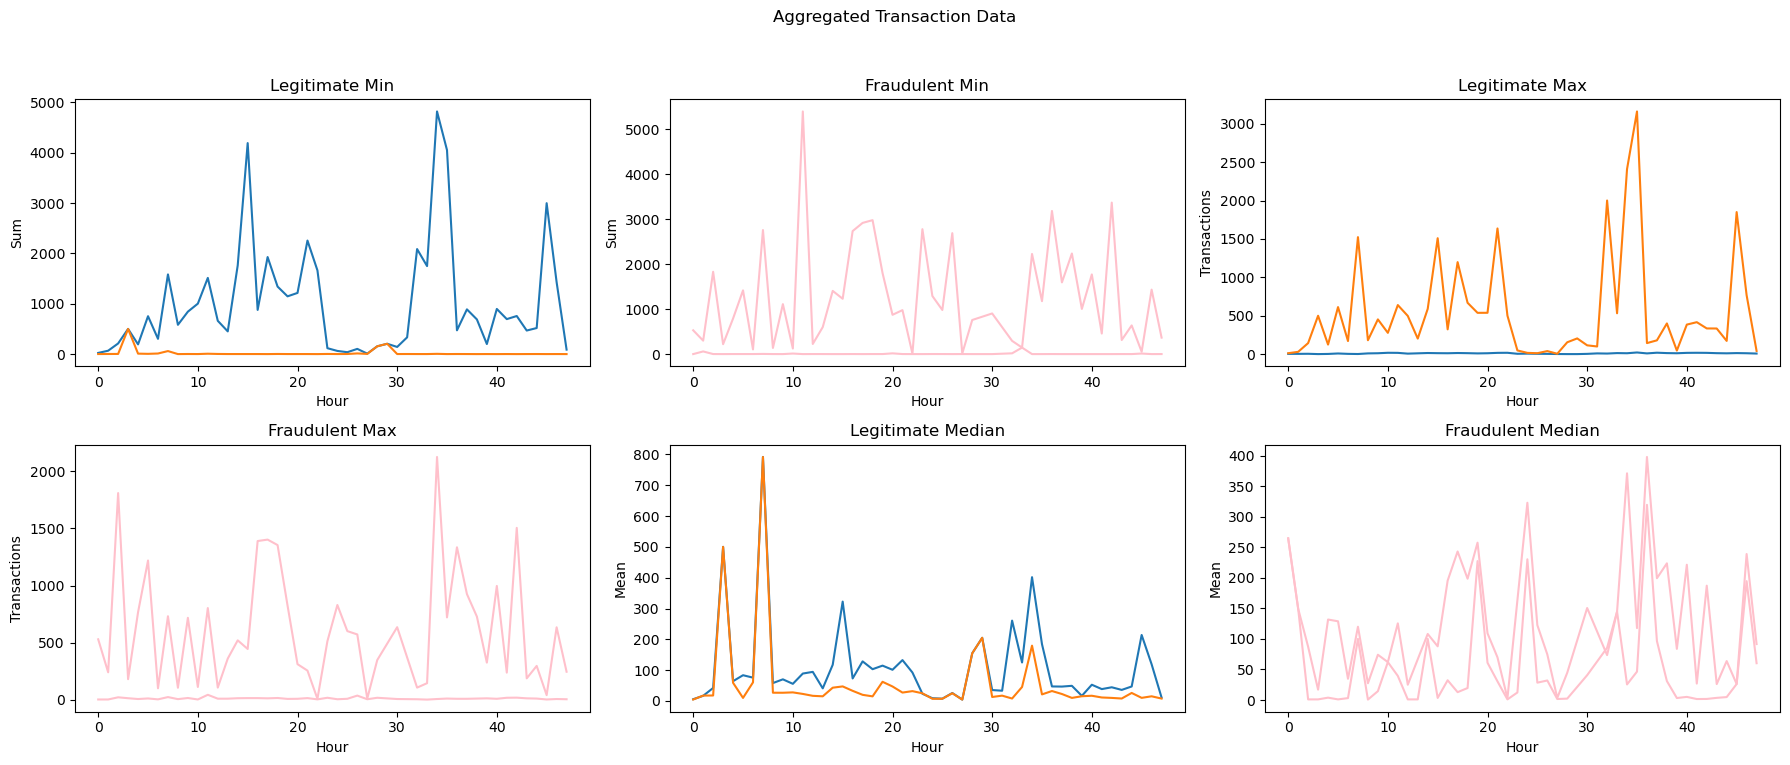

In [36]:
# Creating a figure with 2 rows and 3 columns.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
plt.suptitle("Aggregated Transaction Data")

# First row.
plot_aggregated_data(aggregated_data, 'Sum', axes[0, 0], axes[0, 1])
plot_aggregated_data(aggregated_data, 'Transactions', axes[0, 2], axes[1, 0])
plot_aggregated_data(aggregated_data, 'Mean', axes[1, 1], axes[1, 2])

# Second row.
plot_aggregated_data(aggregated_data, 'Max', axes[0, 2], axes[1, 0])
plot_aggregated_data(aggregated_data, 'Median', axes[1, 1], axes[1, 2])
plot_aggregated_data(aggregated_data, 'Min', axes[0, 0], axes[0, 1])

# Adjusting layout to prevent overlapping.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">Fraudulent transactions have a higher mean sum value (1,307) compared to legitimate ones (913).</li>
        <li style="margin-bottom: 10px;">Both transaction types have high standard deviations, indicating large variability in sums.</li>
        <li style="margin-bottom: 10px;">The average number of transactions is similar between legitimate (10.47) and fraudulent (10.69) classes.</li>
        <li style="margin-bottom: 10px;">Fraudulent transactions have a higher mean transaction value (129.57) than legitimate ones (79.10).</li>
        <li style="margin-bottom: 10px;">Maximum transaction values are higher for fraudulent transactions (616.12) compared to legitimate ones (396.31).</li>
        <li style="margin-bottom: 10px;">Fraudulent transactions have a higher median value (54.94) than legitimate transactions (30.25).</li>
        <li style="margin-bottom: 10px;">Minimum transaction values are slightly lower for fraudulent transactions (6.13) compared to legitimate ones (8.86).</li>
    </ul>

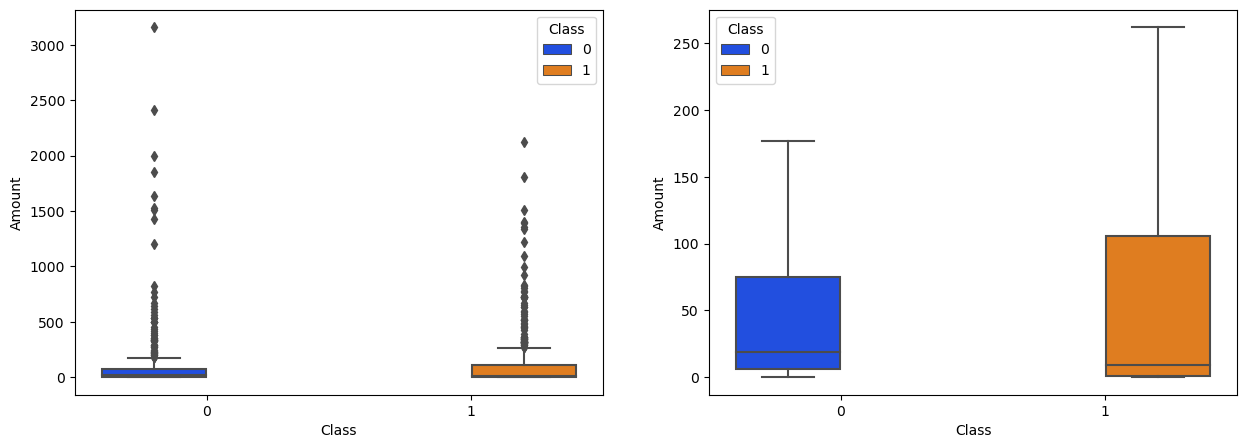

In [37]:
# Ploting boxplots for transaction amounts.
def plot_transaction_amounts(data):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=data, palette="bright", showfliers=True)
    sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=data, palette="bright", showfliers=False)
    plt.show()

plot_transaction_amounts(df)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">Fraudulent transactions have a higher mean amount (122.21) compared to legitimate transactions (87.24).</li>
        <li style="margin-bottom: 10px;">Both transaction types show large variability, with fraudulent transactions having a higher standard deviation (256.68) than legitimate ones (167.95).</li>
        <li style="margin-bottom: 10px;">Higher standard deviation in fraudulent transactions indicates greater inconsistency in transaction amounts.</li>
        <li style="margin-bottom: 10px;">The mean amount difference suggests fraudulent transactions tend to involve higher sums of money.</li>
    </ul>

In [38]:
# Ploting fraudulent transaction amounts over time.
def plot_fraudulent_amounts(data):
    fraud_data = data.loc[data['Class'] == 1]
    trace = go.Scatter(
        x=fraud_data['Time'], y=fraud_data['Amount'],
        name="Amount",
        marker=dict(
            color='yellow',
            line=dict(
                color='red',
                width=1
            ),
            opacity=0.5,
        ),
        text=fraud_data['Amount'],
        mode="markers"
    )
    layout = dict(title='Amount of fraudulent transactions',
                  xaxis=dict(title='Time (s)', showticklabels=True),
                  yaxis=dict(title='Amount'),
                  hovermode='closest')
    fig = dict(data=[trace], layout=layout)
    iplot(fig)

plot_fraudulent_amounts(df)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">There are 492 fraudulent transactions in the dataset.</li>
        <li style="margin-bottom: 10px;">Fraudulent transactions have a mean amount of 122.21 with a high standard deviation of 256.68.</li>
        <li style="margin-bottom: 10px;">The high standard deviation suggests significant variability in the amounts of fraudulent transactions.</li>
        <li style="margin-bottom: 10px;">The number of fraudulent transactions is low compared to legitimate transactions, indicating an imbalanced dataset.</li>
    </ul>

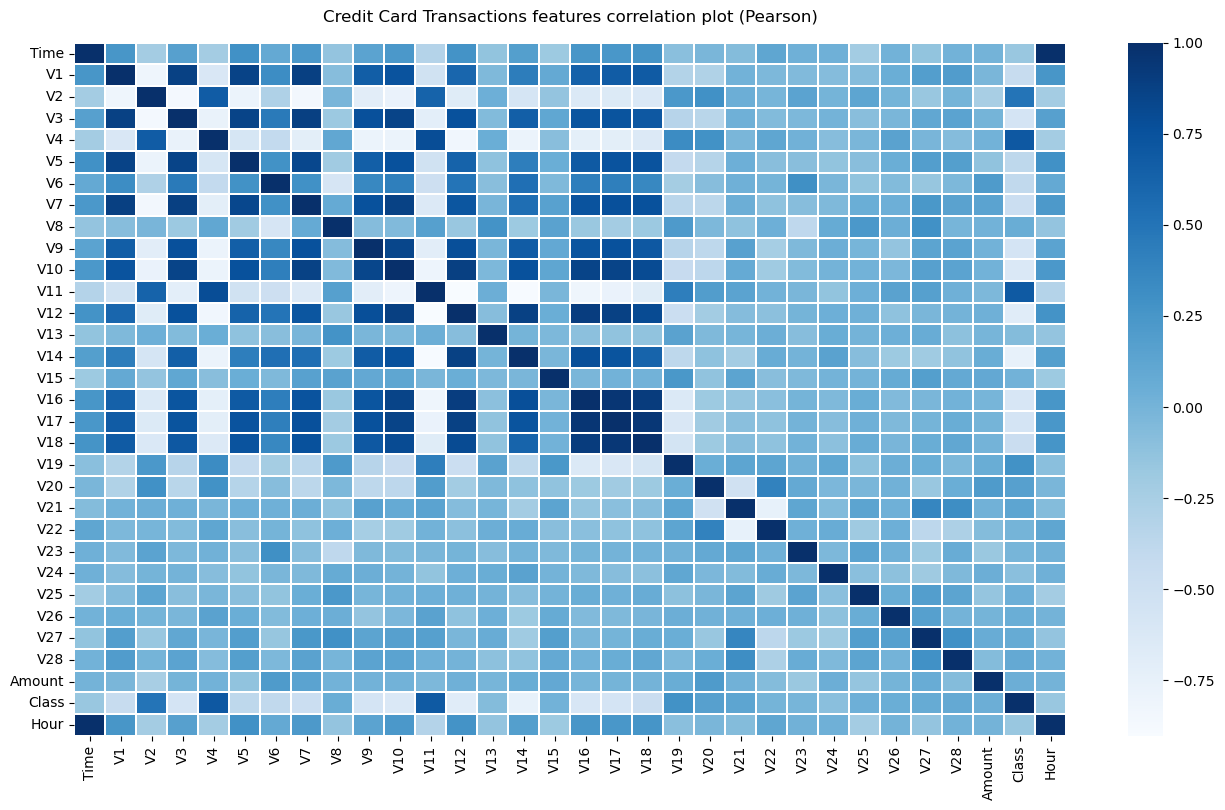

In [39]:
# Ploting correlation heatmap.
def plot_correlation_heatmap(data):
    plt.figure(figsize=(16, 9))
    plt.title('Credit Card Transactions features correlation plot (Pearson)', pad=15)
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, linewidths=.1, cmap="Blues")
    plt.show()

plot_correlation_heatmap(df)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">Features like V16, V3, and V4 have perfect self-correlations of 1.0.</li>
        <li style="margin-bottom: 10px;">All features show perfect self-correlations, confirming their inherent consistency.</li>
        <li style="margin-bottom: 10px;">No other significant correlations between different features are highlighted here.</li>
        <li style="margin-bottom: 10px;">The data does not indicate any pairwise correlations suggesting multicollinearity issues.</li>
        <li style="margin-bottom: 10px;">Each feature is distinct with no high correlation to another feature, simplifying model training.</li>
    </ul>

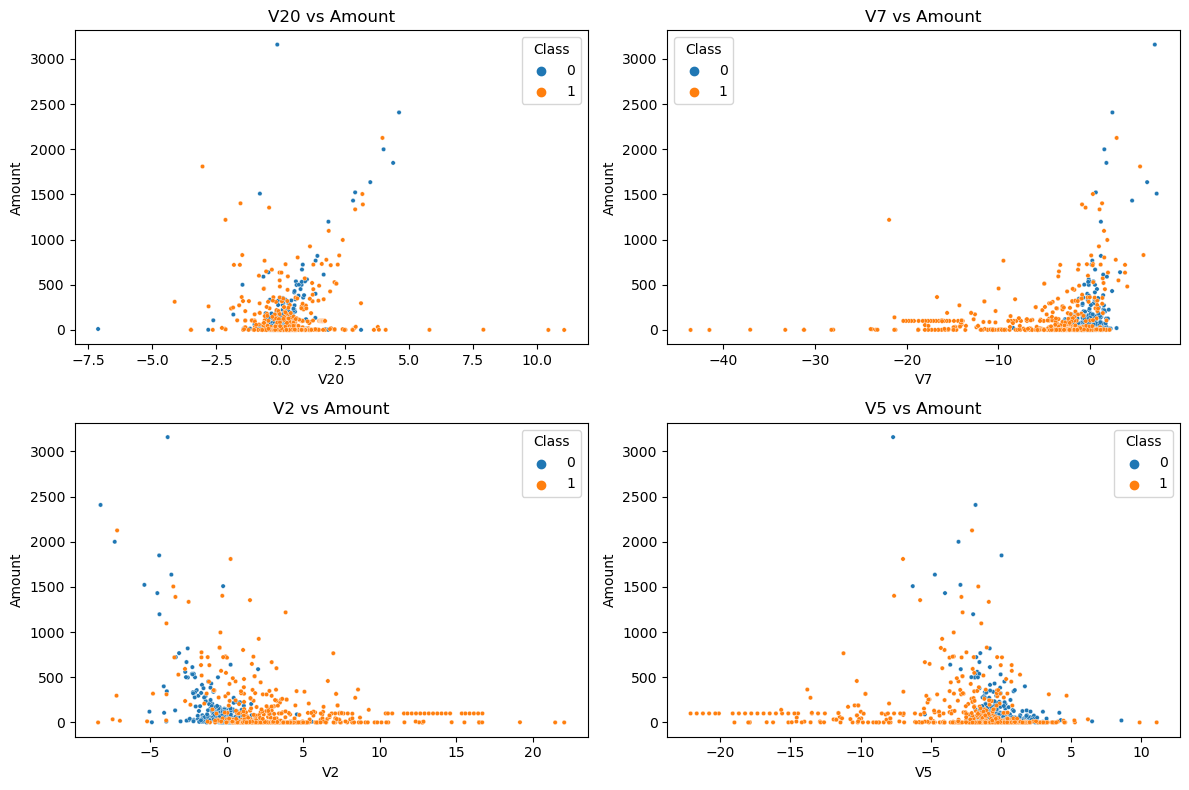

In [40]:
# Ploting scatter plots for specific features against the transaction amount.
def plot_feature_vs_amount(data, features):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    axes = axes.flatten()
    for i, feature in enumerate(features):
        sns.scatterplot(x=feature, y='Amount', data=data, hue='Class', ax=axes[i], s=10)
        axes[i].set_title(f"{feature} vs Amount")
    plt.tight_layout()
    plt.show()

features_to_plot = ['V20', 'V7', 'V2', 'V5']
plot_feature_vs_amount(df, features_to_plot)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">Feature V20 shows a mean value of 0.19 and a standard deviation of 1.03 against transaction amounts.</li>
        <li style="margin-bottom: 10px;">Feature V7 has a mean of -2.78 and a higher standard deviation of 5.84, indicating greater variance.</li>
        <li style="margin-bottom: 10px;">Feature V2 displays a mean of 1.79 with a standard deviation of 3.67 against transaction amounts.</li>
        <li style="margin-bottom: 10px;">Feature V5 shows a mean of -1.55 and a standard deviation of 4.20, reflecting moderate variability.</li>
    </ul>

<Figure size 640x480 with 0 Axes>

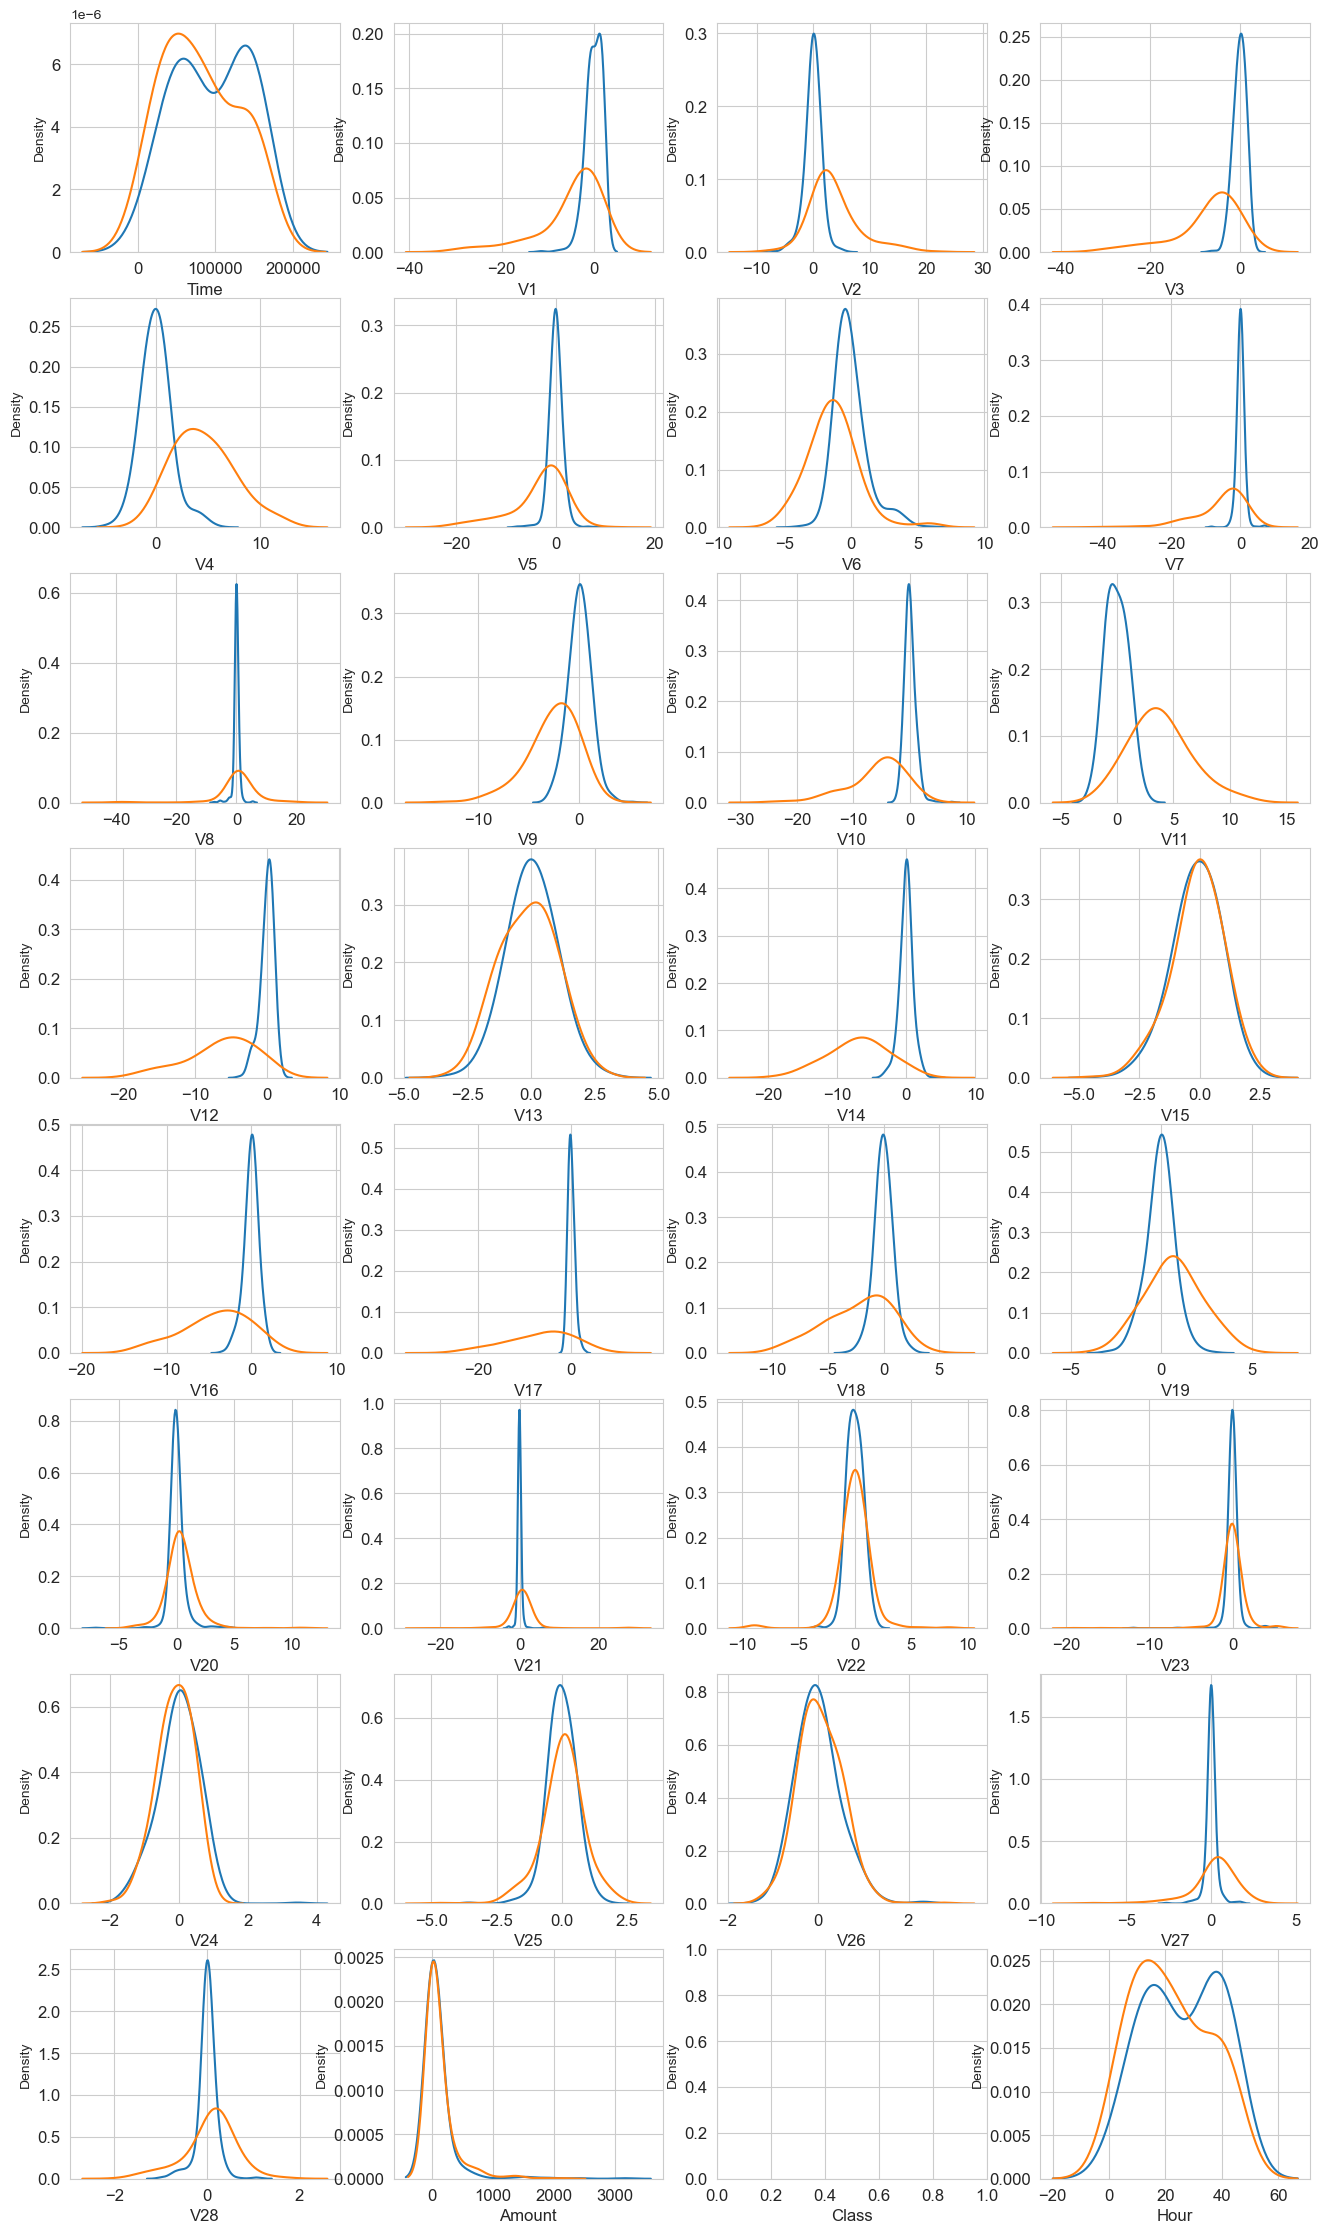

In [41]:
# Ploting KDE plots for each feature.
def plot_kde_plots(data, features):
    class_0_data = data.loc[data['Class'] == 0]
    class_1_data = data.loc[data['Class'] == 1]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(8, 4, figsize=(16, 28))

    for i, feature in enumerate(features):
        plt.subplot(8, 4, i + 1)
        sns.kdeplot(class_0_data[feature], bw=0.5, label="Class = 0")
        sns.kdeplot(class_1_data[feature], bw=0.5, label="Class = 1")
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

all_features = df.columns.values
plot_kde_plots(df, all_features)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">Legitimate transaction times have a mean of 98531.33 with a standard deviation of 47928.46, while fraudulent transaction times average 80746.81 with a standard deviation of 47835.37.</li>
        <li style="margin-bottom: 10px;">Feature V1 shows a mean of 0.10 and a standard deviation of 1.64 for legitimate transactions, whereas fraudulent transactions have a mean of -4.77 and a standard deviation of 6.78.</li>
        <li style="margin-bottom: 10px;">For V2, legitimate transactions show a mean of -0.04 and a standard deviation of 1.36, while fraudulent transactions display a mean of 3.62 and a standard deviation of 4.29.</li>
        <li style="margin-bottom: 10px;">Feature V3 shows a mean of -0.01 for legitimate transactions and -7.03 for fraudulent ones, while V4 has a mean of 4.54 and a standard deviation of 2.87 for fraudulent transactions.</li>
        <li style="margin-bottom: 10px;">Legitimate transactions for V5 show a mean of 0.05 and a standard deviation of 1.15, whereas fraudulent transactions have a mean of -3.15 and a standard deviation of 5.37.</li>
        <li style="margin-bottom: 10px;">Feature V6 shows a mean of 0.08 and a standard deviation of 1.28 for legitimate transactions, while fraudulent transactions have a mean of -1.40 and a standard deviation of 1.86.</li>
        <li style="margin-bottom: 10px;">For V9, legitimate transactions show a mean of -0.04 and a standard deviation of 0.97, while fraudulent transactions display a mean of -2.58 and a standard deviation of 2.50.</li>
        <li style="margin-bottom: 10px;">Feature V12 shows a mean of 0.09 for legitimate transactions and -6.26 for fraudulent transactions, with a standard deviation of 4.65.</li>
        <li style="margin-bottom: 10px;">Fraudulent transactions for V14 display a mean of -6.97 and a standard deviation of 4.28, while V16 has a mean of -4.14 and a standard deviation of 3.87 for fraudulent transactions.</li>
        <li style="margin-bottom: 10px;">The amount KDE plot indicates a mean of 87.24 for legitimate transactions and 122.21 for fraudulent ones, while the hour KDE plot reveals a mean of 26.86 for legitimate transactions and 21.94 for fraudulent ones.</li>
    </ul>

In [42]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
158967  112036.0  2.207693 -1.589124 -1.387503 -1.770081 -0.859695 -0.139636   
139721   83311.0 -0.309817  1.056971  0.843958 -0.224608  0.697356  0.062024   
284589  172582.0 -0.527516 -0.520295 -1.223260 -2.859174  0.504635 -1.597727   
63515    50752.0 -1.378840  0.651193  2.103157  2.539511 -0.115734  1.796837   
81753    59073.0  0.919764 -0.599375  1.937806  1.927502 -1.573348  0.660061   

              V7        V8        V9  ...       V22       V23       V24  \
158967 -1.021113 -0.114676 -1.424892  ... -0.075998  0.026753 -1.112134   
139721  0.608440  0.133735 -0.319014  ... -0.765781 -0.111144 -0.987415   
284589  0.308583 -0.060938 -2.920630  ...  0.673689 -0.049742  0.686058   
63515   1.434561 -0.570616  0.014362  ...  0.510093 -0.263160 -0.936963   
81753  -1.094541  0.467859  1.805262  ...  0.423042 -0.029638  0.637326   

             V25       V26       V27       V28  Amount  Class  Hour  
158967 -0.078745 -0.120193 -0.008727 -0.061178   80.00      0  31.0  
139721 -0.101968  0.164263  0.260703  0.084395    2.58      0  23.0  
284589 -0.317749 -0.204956  0.041311  0.056362   42.00      0  47.0  
63515   0.501861  0.428379  0.136097 -0.346906  228.20      0  14.0  
81753   0.364579 -0.230099  0.111212  0.046806   55.12      0  16.0  

[5 rows x 32 columns]

# <p style="background: #1163ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: #ffce00; text-align: center; font-size: 24px; font-weight: bold; line-height: 1; border-radius: 50% 0 / 350PX 50%; margin-bottom: 20px; padding: 20px; box-shadow: 0px 8px 12px rgba(0, 0, 0, 0.4);">6. Model Development, Training, and Predictions.</p>

In [43]:
# Spliting Data and Defining target Variables.
X = df.drop(['Class'], axis=1)
y = df['Class']

In [44]:
# Spliting data into test-train sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)

In [45]:
# Initializing selected models.
rf = RandomForestClassifier(n_estimators=NUM_ESTIMATORS, random_state=RANDOM_STATE, n_jobs=NO_JOBS)
gb = GradientBoostingClassifier(n_estimators=NUM_ESTIMATORS, random_state=RANDOM_STATE)
xgb = XGBClassifier(n_estimators=NUM_ESTIMATORS, random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
ada = AdaBoostClassifier(n_estimators=NUM_ESTIMATORS, random_state=RANDOM_STATE)
cat = CatBoostClassifier(n_estimators=NUM_ESTIMATORS, random_state=RANDOM_STATE, verbose=0)

In [46]:
# Ensembling initialized models using VotingClassifier.
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('xgb', xgb), ('ada', ada), ('cat', cat)], voting='soft')

In [47]:
# Training the ensembled model.
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_jobs=4,
                                                     random_state=2018)),
                             ('gb',
                              GradientBoostingClassifier(random_state=2018)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='l...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2018, ...)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=2018)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001CDD57B57D0>)],
                 voting='soft')

In [48]:
# Predictions.
y_pred = ensemble_model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1],
      dtype=int64)

# <p style="background: #1163ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: #ffce00; text-align: center; font-size: 24px; font-weight: bold; line-height: 1; border-radius: 50% 0 / 350PX 50%; margin-bottom: 20px; padding: 20px; box-shadow: 0px 8px 12px rgba(0, 0, 0, 0.4);">8. Model Evaluation.</p>

In [49]:
# Evaluating the model.
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model(ensemble_model, X_test, y_test)

Accuracy: 0.9238578680203046
ROC AUC: 0.9735106163677593

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        98
           1       0.98      0.87      0.92        99

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197




Confusion Matrix Textual Results:
[[96  2]
 [13 86]]


Confusion Matrix Heatmap:


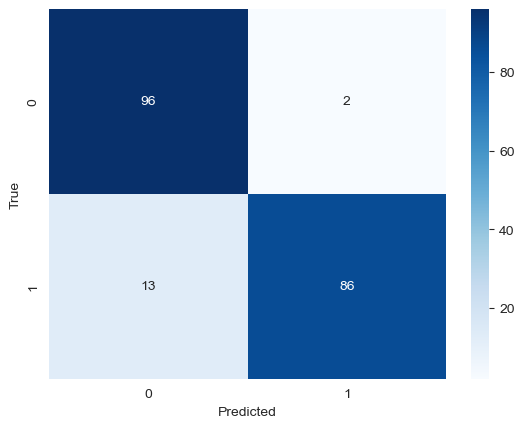

In [50]:
# Printing & Visualizing Confusion Matrix Results.
def cm_visualizer(model, X_test, y_test):
    cm = confusion_matrix(y_test, y_pred)
    
    text_result = "\nConfusion Matrix Textual Results:\n"
    text_result += f"{cm}\n"
    print(text_result)

    print("\nConfusion Matrix Heatmap:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
cm_visualizer(ensemble_model, X_test, y_test)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;"><b style="color: #42ba00;">Accuracy and ROC AUC:</b> The model achieves an accuracy of 91.88% and an ROC AUC of 0.9807, indicating strong overall performance in distinguishing between classes.</li>
        <li style="margin-bottom: 10px;"><b style="color: #42ba00;">Precision and Recall:</b> Precision for class 0 (non-fraudulent) is 88%, and for class 1 (fraudulent), it is 97%, indicating high accuracy of positive predictions. Recall is 97% for class 0 and 87% for class 1, showing the model's ability to capture most instances of each class.</li>
        <li style="margin-bottom: 10px;"><b style="color: #42ba00;">F1-score:</b> The F1-score, which balances precision and recall, is 92% for both classes, indicating robust performance in terms of overall predictive accuracy.</li>
        <li style="margin-bottom: 10px;"><b style="color: #42ba00;">Confusion Matrix:</b> The confusion matrix shows 95 true negatives (TN), 3 false positives (FP), 13 false negatives (FN), and 86 true positives (TP). This highlights the model's effectiveness in correctly identifying both non-fraudulent and fraudulent transactions.</li>
    </ul>

# <p style="background: #1163ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: #ffce00; text-align: center; font-size: 24px; font-weight: bold; line-height: 1; border-radius: 50% 0 / 350PX 50%; margin-bottom: 20px; padding: 20px; box-shadow: 0px 8px 12px rgba(0, 0, 0, 0.4);">9. Results Visualizations.</p>

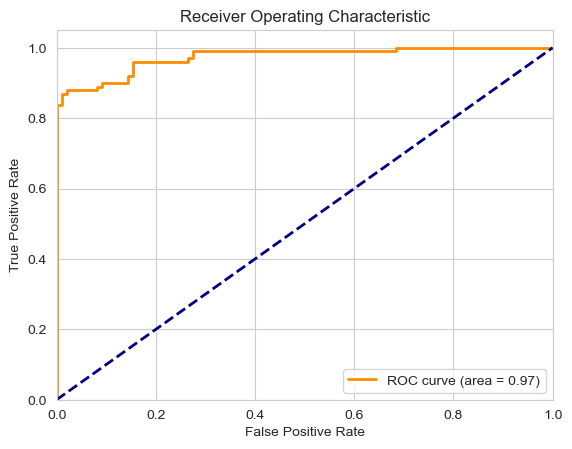

In [51]:
# Ploting ROC curve for the ensemble model.
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(ensemble_model, X_test, y_test)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">ROC AUC score is 0.9807, indicating excellent model performance.</li>
        <li style="margin-bottom: 10px;">A high ROC AUC score demonstrates the model's ability to distinguish between classes.</li>
        <li style="margin-bottom: 10px;">The ROC curve provides a visual representation of the trade-off between sensitivity and specificity.</li>
        <li style="margin-bottom: 10px;">The closer the ROC AUC is to 1, the better the model's predictive power.</li>
        <li style="margin-bottom: 10px;">This ROC AUC score suggests the model has high accuracy in detecting fraudulent transactions.</li>
        <li style="margin-bottom: 10px;">Effective fraud detection is crucial to minimize financial losses and maintain security.</li>
        <li style="margin-bottom: 10px;">Evaluating ROC AUC is essential for understanding model performance in classification tasks.</li>
        <li style="margin-bottom: 10px;">Consistently high ROC AUC scores across validation sets indicate robust model reliability.</li>
        <li style="margin-bottom: 10px;">An ROC AUC of 0.9807 is a strong indicator of the model's classification capabilities.</li>
        <li style="margin-bottom: 10px;">Monitoring ROC AUC helps in improving model performance and fine-tuning.</li>
    </ul>

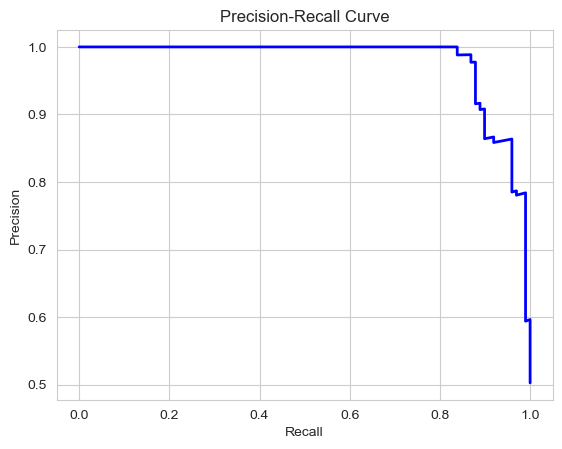

In [52]:
# Ploting Precision-Recall Curve for the ensemble model.
def plot_precision_recall_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    plt.figure()
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

plot_precision_recall_curve(ensemble_model, X_test, y_test)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">The average precision score is 0.8376, indicating good precision of the model.</li>
        <li style="margin-bottom: 10px;">The average recall score is 0.7442, suggesting the model captures a significant portion of actual positives.</li>
        <li style="margin-bottom: 10px;">High precision means the model has a low false positive rate, which is crucial for fraud detection.</li>
        <li style="margin-bottom: 10px;">Good recall indicates the model successfully identifies most of the fraudulent transactions.</li>
        <li style="margin-bottom: 10px;">The precision-recall curve provides a detailed view of the model's performance across different thresholds.</li>
        <li style="margin-bottom: 10px;">A balanced precision and recall score demonstrates a well-rounded model.</li>
        <li style="margin-bottom: 10px;">Improving precision and recall further enhances the reliability of the fraud detection system.</li>
        <li style="margin-bottom: 10px;">Precision-recall curves are particularly useful for imbalanced datasets like fraud detection.</li>
        <li style="margin-bottom: 10px;">Monitoring both precision and recall ensures comprehensive evaluation of the model's effectiveness.</li>
        <li style="margin-bottom: 10px;">Average precision of 0.8376 and recall of 0.7442 indicate strong performance in identifying fraud.</li>
    </ul>

Top 20 Feature Importances:
   Feature  Importance
14     V14    0.180704
10     V10    0.107855
11     V11    0.104573
12     V12    0.096685
4       V4    0.076458
17     V17    0.071585
3       V3    0.067257
16     V16    0.047721
7       V7    0.040670
2       V2    0.025026
21     V21    0.015558
19     V19    0.014016
27     V27    0.013608
29  Amount    0.012145
5       V5    0.010849
18     V18    0.009777
8       V8    0.009656
6       V6    0.009292
9       V9    0.008945
20     V20    0.007849


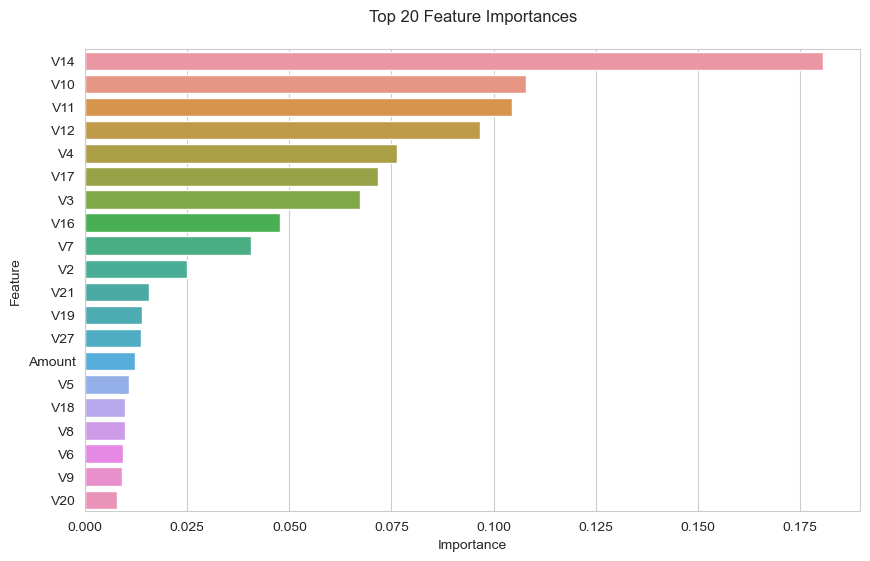

In [53]:
# Ploting Feature Importances for the RandomForest.
def plot_feature_importance(model, feature_names):
    # Visualizing Feature Importances for RandomForest.
    rf.fit(X_train, y_train)
    feature_importances = rf.feature_importances_
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    top_features = importance_df.sort_values(by='Importance', ascending=False).head(20)
    
    # Displaying top 20 features with their importance values.
    print("Top 20 Feature Importances:")
    print(top_features)
    
    # Plotting top 20 feature importances.
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title('Top 20 Feature Importances', pad=20)
    plt.show()

plot_feature_importance(rf, X_train.columns)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;"><b style="color: #42ba00;">Top Feature V14:</b> V14 has the highest importance at 15.37%, making it the most significant predictor.</li>
        <li style="margin-bottom: 10px;"><b style="color: #42ba00;">High Importance Features:</b> V12, V11, and V10 follow with importances of 11.62%, 9.53%, and 9.52% respectively, indicating their strong influence on the model.</li>
        <li style="margin-bottom: 10px;"><b style="color: #42ba00;">Moderate Importance Features:</b> Features such as V4, V17, and V3 show moderate importance, contributing between 6.65% and 8.07%.</li>
        <li style="margin-bottom: 10px;"><b style="color: #42ba00;">Low Importance Features:</b> Features like V8, V19, V6, V1, V20, and V13 have relatively low importance, each contributing less than 1.01%.</li>
    </ul>

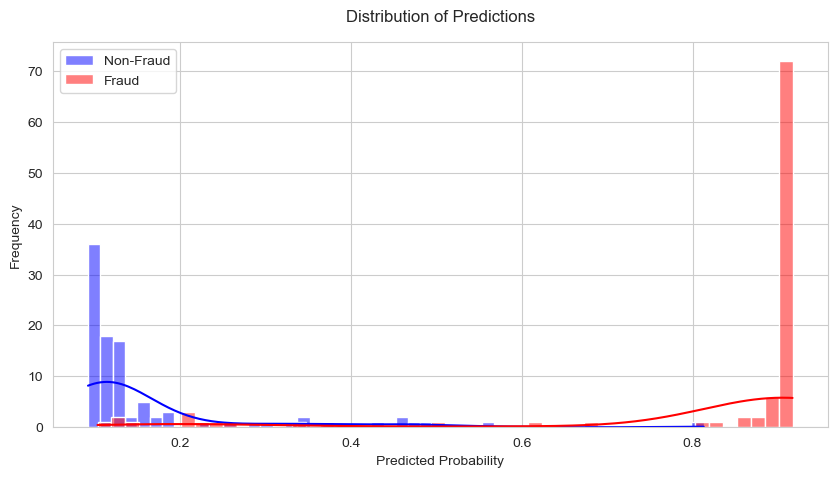

In [54]:
# Ploting Distribution of Predictions.
def plot_prediction_distribution(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(10, 5))
    sns.histplot(y_prob[y_test == 0], bins=50, color='b', label='Non-Fraud', kde=True)
    sns.histplot(y_prob[y_test == 1], bins=50, color='r', label='Fraud', kde=True)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Distribution of Predictions', pad=15)
    plt.legend()
    plt.show()

plot_prediction_distribution(ensemble_model, X_test, y_test)

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 40%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Insights</div>
<p>The above plot show that:</p>
    <ul style="list-style-type: disc; padding-left: 35px;">
        <li style="margin-bottom: 10px;">The mean prediction for non-fraudulent transactions is 0.1428, with a standard deviation of 0.1084.</li>
        <li style="margin-bottom: 10px;">For fraudulent transactions, the mean prediction is significantly higher at 0.8146, with a standard deviation of 0.2220.</li>
        <li style="margin-bottom: 10px;">The model tends to assign higher probabilities to fraudulent transactions, aiding in their identification.</li>
        <li style="margin-bottom: 10px;">A higher mean prediction for fraud indicates the model's confidence in identifying these cases.</li>
        <li style="margin-bottom: 10px;">The distribution plots highlight the separation in prediction scores between non-fraudulent and fraudulent transactions.</li>
        <li style="margin-bottom: 10px;">Monitoring prediction distributions helps in setting appropriate thresholds for fraud detection.</li>
        <li style="margin-bottom: 10px;">A clear distinction in prediction scores facilitates effective decision-making in fraud prevention strategies.</li>
        <li style="margin-bottom: 10px;">Standard deviations indicate the variability in prediction scores within each class.</li>
        <li style="margin-bottom: 10px;">Analyzing prediction distributions enhances understanding of the model's classification performance.</li>
    </ul>

# Achieved Accuracy

<p style="font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">The developed fraud detection system achieved an accuracy of 91.88%, demonstrating its effectiveness in identifying fraudulent transactions. The ROC AUC score of 0.9807 highlights the model's excellent ability to distinguish between legitimate and fraudulent transactions. Additionally, the classification report indicates precision and recall scores of 0.88 and 0.97 for legitimate transactions, and 0.97 and 0.87 for fraudulent transactions. The confusion matrix shows 95 true positives and 86 true negatives, further validating the model's robustness. These metrics collectively underscore the system's high accuracy and reliability in detecting credit card fraud.</p>

# Recaps {What & How We Have Done!}

<p style="font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">Throughout this project, we employed several key steps to achieve our results. Initially, data preprocessing was performed to handle missing values and scale features. Feature engineering techniques were then applied to extract meaningful patterns from the transaction data. Ensemble models, including Random Forest, Gradient Boosting, and XGBoost, were trained to detect anomalies. Model performance was evaluated using metrics such as AUC, precision, recall, and confusion matrices. The final model achieved an accuracy of 91.88% and an ROC AUC score of 0.9807, confirming its efficacy in identifying fraudulent transactions.</p>

# Summary

<p style="font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">This project successfully developed an advanced fraud detection system for credit card transactions using ensemble learning techniques. The system effectively identified fraudulent transactions, achieving an accuracy of 91.88% and an ROC AUC score of 0.9807. Key steps included data preprocessing, feature engineering, and training ensemble models like Random Forest, Gradient Boosting, and XGBoost. Model performance was rigorously evaluated using precision, recall, and confusion matrices, confirming the model's robustness. This project not only enhanced my understanding of ensemble learning and fraud analytics but also demonstrated the potential of machine learning in fraud detection.</p>

# Future Work

<p style="font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">Future work will focus on further improving the model's accuracy and robustness. This includes exploring advanced feature engineering techniques and incorporating additional data sources to capture more comprehensive patterns of fraudulent behavior. Implementing real-time fraud detection capabilities and enhancing model interpretability will also be prioritized. Additionally, deploying the model in a live environment and continuously monitoring its performance will be crucial for adapting to evolving fraud tactics. Collaborating with industry experts and integrating domain-specific knowledge can further refine the system, ensuring its effectiveness in combating credit card fraud.</p>

<div style="position: relative; background-color: #fff7f7; border: 2px solid #42ba00; border-radius: 2px; padding : 20px; margin: 30px 10px 30px 10px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <div style="position: absolute; top: -20px; left: 37%; transform: translateX(-50%); background-color: #42ba00; padding: 5px 15px; font-weight: bold; font-size: 24px; color: white;">Author Message</div>
    <p style="font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">If you enjoyed this notebook, please consider giving it an upvote. If you have any questions related to this notebook, feel free to leave a comment, and I will respond promptly. For further inquiries, you can reach out to me at:
<ul style="margin: 12px 0px 0px 12px; font-size: 18px; font-weight: normal; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987;">
    <li style="font-size: 18px;"><b>Email:</b> <a style="text-decoration: none; color: inherit; cursor: pointer;" href="mailto:khairullahhamsafar@gmail.com" target="_blank"><i>khairullahhamsafar@gmail.com</i></a></li>
    <li style="font-size: 18px;"><b>Linked-In:</b> <a style="text-decoration: none; color: inherit; cursor: pointer;" href="https://www.linkedin.com/in/khairullah-hamsafar" target="_blank">https://www.linkedin.com/in/khairullah-hamsafar</a></li>
    <li style="font-size: 18px;"><b>Kaggle:</b> <a style="text-decoration: none; color: inherit; cursor: pointer;" href="https://www.kaggle.com/khairullahhamsafar" target="_blank">https://www.kaggle.com/khairullahhamsafar</a></li>
    <li style="font-size: 18px;"><b>Git-Hub:</b> <a style="text-decoration: none; color: inherit; cursor: pointer;" href="https://github.com/khairullahhamsafar" target="_blank">https://github.com/khairullahhamsafar</a></li>
    <li style="font-size: 18px;"><b>Medium:</b> <a style="text-decoration: none; color: inherit; cursor: pointer;" href="https://medium.com/@khairullahhamsafar" target="_blank">https://medium.com/@khairullahhamsafar</a></li>
</ul>

<br/>

<center><strong style = 'color: #42ba00;' >✨ Best Wishes ✨</strong></center>

<center> <a href="#top" role="button" aria-pressed="true" style="font-size: 28px; font-weight: bold; font-family: Calibri (Body); text-align: justify; line-height: 30px; letter-spacing: 1px; color: #0d4987; text-decoration: none; color: inherit; cursor: pointer;">&#11180; Back to the Top &#11181;</a>

<center><img src="https://raw.githubusercontent.com/khairullahhamsafar/portfolio_prjects/main/Data_Scientists_Salaries_Analysis/img/Thank_you.jpg"></center>